In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df  = df.select_dtypes(include = np.number)

In [4]:
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


In [5]:
# checking if any feature has null value
df.isna().any()

Hours Studied                       False
Previous Scores                     False
Sleep Hours                         False
Sample Question Papers Practiced    False
Performance Index                   False
dtype: bool

In [6]:
features = df.drop('Performance Index', axis = 1)

In [7]:
def training_matrix(df):
    m,n = df.shape
    x = np.zeros((m,n))
    for i in range(m):
        x[i] = df.iloc[i].values
    return x

In [8]:
def feature_scale(df,feature):
    '''
    df : a pandas DataFrame, here a dataframe which contains only input_labels
    feature : column of the df
    '''
    m = df[feature].shape[0]
    feature_scaled = np.zeros(m)
    feature_max = df[feature].max()
    for i in range(m):
        feature_scaled[i] = df[feature].iloc[i]/feature_max
    return feature_scaled

#function to scale all feature of a df and return a df
def scale_all(df):
    n = df.columns.shape[0]
    zero_data = np.zeros(shape=(len(df), n))
    df_scaled = pd.DataFrame(zero_data, columns= df.columns)
    for i in range(n):
        df_scaled[df_scaled.columns[i]] = feature_scale(df,df.columns[i])
    return df_scaled

In [9]:
scaled_df = scale_all(df)
scaled_df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.777778,1.000000,1.000000,0.111111,0.91
1,0.444444,0.828283,0.444444,0.222222,0.65
2,0.888889,0.515152,0.777778,0.222222,0.45
3,0.555556,0.525253,0.555556,0.222222,0.36
4,0.777778,0.757576,0.888889,0.555556,0.66
...,...,...,...,...,...
9995,0.111111,0.494949,0.444444,0.222222,0.23
9996,0.777778,0.646465,0.888889,0.555556,0.58
9997,0.666667,0.838384,0.888889,0.555556,0.74
9998,1.000000,0.979798,0.777778,0.000000,0.95


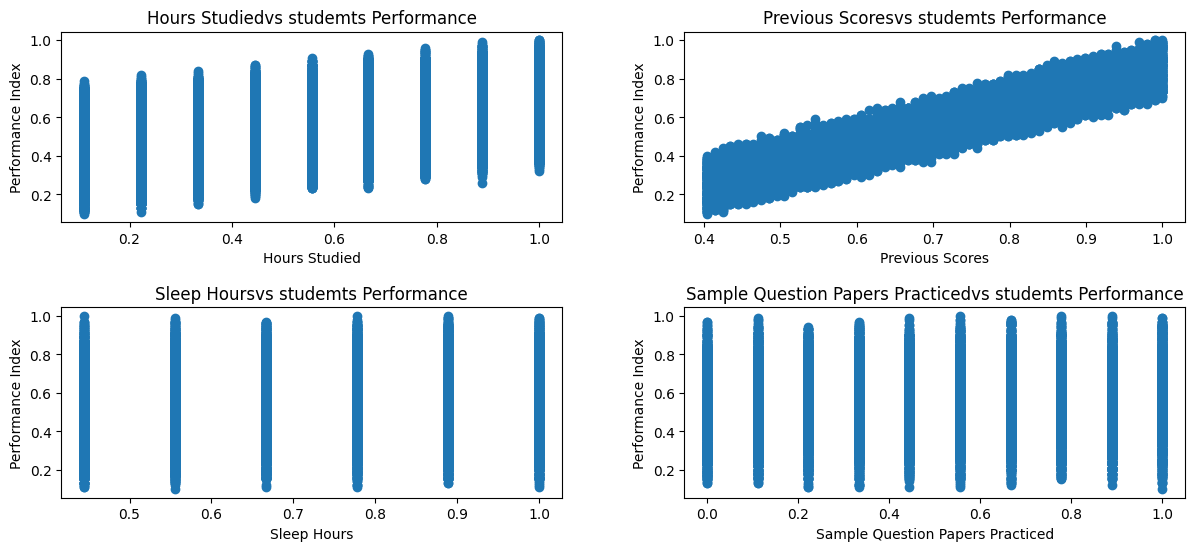

In [10]:
figure,axes = plt.subplots(3,2, figsize = (7,8))
for (i, feature) in enumerate(scaled_df):
    axes[i//2, i%2].scatter(scaled_df[feature], scaled_df['Performance Index'])
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel('Performance Index')
    axes[i//2, i%2].set_title(feature + 'vs studemts Performance')
figure.tight_layout()
figure.subplots_adjust(top=1, right =1.7)
figure.delaxes(axes[2,1])
figure.delaxes(axes[2,0])

In [11]:
def cost_function(x,y,w,b):
    m = x.shape[0]
    summation = 0
    fx = np.zeros(m)
    for i in range(m):
        fx[i]= w.dot(x[i]) + b
        summation += (fx[i] - y[i])**2
    jw = summation/(2*m)
    return jw

In [12]:
x = training_matrix(scaled_df.drop('Performance Index', axis = 1))
y = scaled_df['Performance Index'].values
w = np.array([1,1,1,1])
b = 1

In [13]:
cost_function(x,y,w,b)

np.float64(4.4082238172839725)

In [22]:
x.shape, y.shape, w.shape

((10000, 4), (10000,), (4,))

In [ ]:
plt.plot(cost_hist)
plt.xlabel('iterations')
plt.ylabel('cost')

In [27]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X : (ndarray): Shape (m,n) matrix of examples with multiple features
      w : (ndarray): Shape (n)   parameters for prediction   
      b : (scalar):              parameter  for prediction   
    Returns
      cost: (scalar)             cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i],w) + b       
        cost = cost + (f_wb_i - y[i])**2              
    cost = cost/(2*m)                                 
    return(np.squeeze(cost)) 

def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X : (ndarray Shape (m,n)) matrix of examples 
      y : (ndarray Shape (m,))  target value of each example
      w : (ndarray Shape (n,))  parameters of the model      
      b : (scalar)              parameter of the model      
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i,j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw/m                                
    dj_db = dj_db/m                                
        
    return dj_db,dj_dw


In [28]:
compute_gradient(x,y,w,b)

(np.float64(0.44775200000000176),
 array([0.22774211, 0.28328574, 0.32315744, 0.225372  ]))

In [38]:
def gradient_descent(x,y,w,b,alpha):
    m,n = x.shape
    cost_hist = []
    count = 0
    runit = True
    dj_db, dj_dw = compute_gradient(x,y,w,b)
    while(runit):
        count +=1
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        cost = compute_cost(x,y,w,b)
        cost_hist.append(cost)
        if(cost< 0.01 or count == 10000):
            runit = False
    return w,b,cost,cost_hist,count

In [39]:
x.shape, y.shape, w.shape, b

((10000, 4), (10000,), (4,), 1)

In [40]:
w_opt, b_opt, cost ,cost_hist, itrs = gradient_descent(x,y,w,b,0.000001)

In [42]:
w_opt, b_opt, cost, itrs

(array([-0.00227742, -0.00283286, -0.00323157, -0.00225372]),
 np.float64(0.9955224799996767),
 np.float64(0.11388072048013051),
 10000)

Text(0, 0.5, 'cost')

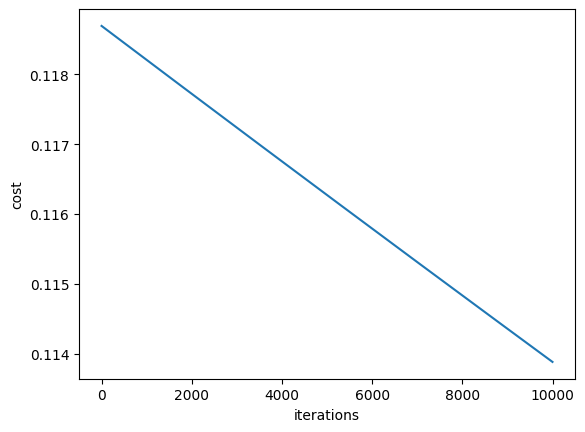

In [43]:
plt.plot(cost_hist)
plt.xlabel('iterations')
plt.ylabel('cost')